# IS5152 Project
## Beijing PM2.5 prediction

In [3]:
import os

# data manipulation
import pandas as pd
import numpy as np

# visualiation
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
for dirname, _, filenames in os.walk('/content/drive/My Drive/IS5152/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/IS5152/data/PRSA_Data_Changping_20130301-20170228.csv
/content/drive/My Drive/IS5152/data/PRSA_Data_Aotizhongxin_20130301-20170228.csv
/content/drive/My Drive/IS5152/data/PRSA_Data_Dingling_20130301-20170228.csv
/content/drive/My Drive/IS5152/data/PRSA_Data_Guanyuan_20130301-20170228.csv
/content/drive/My Drive/IS5152/data/PRSA_Data_Dongsi_20130301-20170228.csv
/content/drive/My Drive/IS5152/data/PRSA_Data_Huairou_20130301-20170228.csv
/content/drive/My Drive/IS5152/data/PRSA_Data_Gucheng_20130301-20170228.csv
/content/drive/My Drive/IS5152/data/PRSA_Data_Shunyi_20130301-20170228.csv
/content/drive/My Drive/IS5152/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv
/content/drive/My Drive/IS5152/data/PRSA_Data_Tiantan_20130301-20170228.csv
/content/drive/My Drive/IS5152/data/PRSA_Data_Wanshouxigong_20130301-20170228.csv
/content/drive/My Drive/IS5152/data/PRSA_Data_Wanliu_20130301-20170228.csv


In [0]:
# Focus on one location first
#df_tt = pd.read_csv('/content/drive/My Drive/IS5152/data/PRSA_Data_Tiantan_20130301-20170228.csv') #use your path
#print(df_tt.dtypes)
#df_tt.head(5)

In [7]:
# Load all locations file
import glob
path =r'/content/drive/My Drive/IS5152/data/' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)
print(frame.dtypes)
frame.head(5)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


# Preliminary Analysis

In [19]:
frame.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [0]:
# drop columns
cols = ['No', 'year', 'month', 'day', 'hour', 'PM10', 'wd', 'station']
df = frame.drop(columns=cols)

In [28]:
df.describe()

,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,412029.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,79.793428,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,80.822391,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,20.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,55.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,111.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [25]:
len(frame[frame['RAIN']==0.0])

403858

In [0]:
# drop column "RAIN" as most of data are zero
df = df.drop(columns=["RAIN"])

In [30]:
# correlation coefficient among variables
df.corr()

,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
PM2.5,1.000000,0.482354,0.666948,0.789998,-0.149697,-0.131127,0.018566,0.114656,-0.272205
SO2,0.482354,1.000000,0.499496,0.535750,-0.165341,-0.321799,0.223236,-0.266781,-0.108717
NO2,0.666948,0.499496,1.000000,0.705500,-0.471587,-0.278192,0.174167,-0.031599,-0.400460
CO,0.789998,0.535750,0.705500,1.000000,-0.313012,-0.326237,0.188195,-0.057129,-0.297511
O3,-0.149697,-0.165341,-0.471587,-0.313012,1.000000,0.594910,-0.445961,0.312074,0.295743
TEMP,-0.131127,-0.321799,-0.278192,-0.326237,0.594910,1.000000,-0.813309,0.820118,0.033036
PRES,0.018566,0.223236,0.174167,0.188195,-0.445961,-0.813309,1.000000,-0.750222,0.065099
DEWP,0.114656,-0.266781,-0.031599,-0.057129,0.312074,0.820118,-0.750222,1.000000,-0.296591
WSPM,-0.272205,-0.108717,-0.400460,-0.297511,0.295743,0.033036,0.065099,-0.296591,1.000000


In [32]:
# missing value
df.isnull().sum()

PM2.5     8739
SO2       9021
NO2      12116
CO       20701
O3       13277
TEMP       398
PRES       393
DEWP       403
WSPM       318
dtype: int64

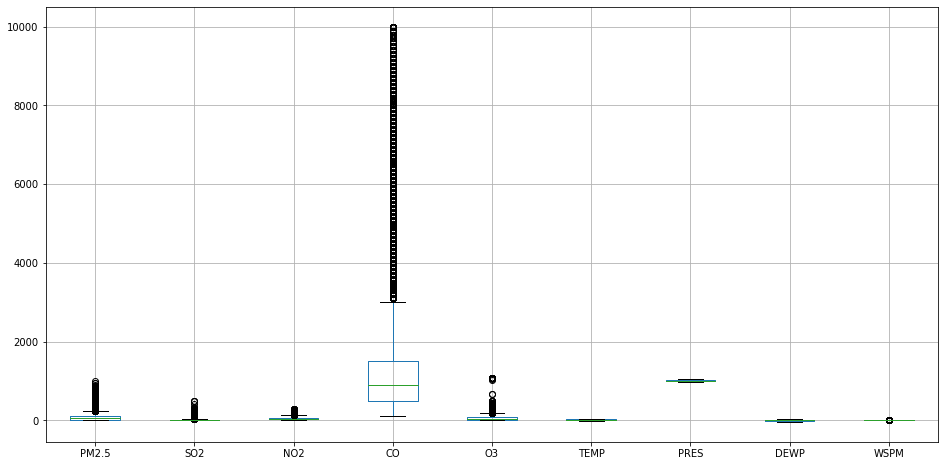

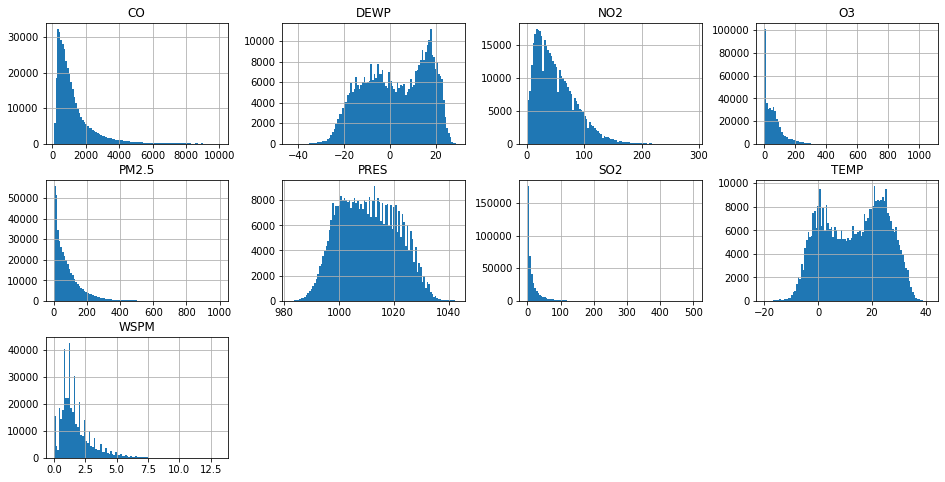

In [33]:
df.boxplot(figsize=[16,8])
df.hist(bins=100, layout=(3,4), figsize=[16,8]);

# Data Cleaning

In [35]:
# Imputation, replace missing value with median
df.fillna(df.median(), inplace=True)
df.isnull().sum()

PM2.5    0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
WSPM     0
dtype: int64

In [36]:
sb.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [37]:
# find correlation factor between features
df.corr()

,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
PM2.5,1.000000,0.478022,0.658526,0.767240,-0.147683,-0.130825,0.019235,0.112726,-0.269476
SO2,0.478022,1.000000,0.491557,0.523455,-0.161700,-0.318509,0.220741,-0.264385,-0.107337
NO2,0.658526,0.491557,1.000000,0.687864,-0.463401,-0.273557,0.171171,-0.030747,-0.393955
CO,0.767240,0.523455,0.687864,1.000000,-0.303764,-0.318067,0.184148,-0.056701,-0.288682
O3,-0.147683,-0.161700,-0.463401,-0.303764,1.000000,0.585811,-0.439053,0.307427,0.292592
TEMP,-0.130825,-0.318509,-0.273557,-0.318067,0.585811,1.000000,-0.813297,0.820115,0.033025
PRES,0.019235,0.220741,0.171171,0.184148,-0.439053,-0.813297,1.000000,-0.750212,0.065085
DEWP,0.112726,-0.264385,-0.030747,-0.056701,0.307427,0.820115,-0.750212,1.000000,-0.296516
WSPM,-0.269476,-0.107337,-0.393955,-0.288682,0.292592,0.033025,0.065085,-0.296516,1.000000


# Feature Transformation

## Normalize Data

,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,PM2.5
0,0.025443,0.020671,0.020202,0.079181,0.286179,0.635762,0.326897,0.0,0.037879,3.0
1,0.011435,0.017211,0.020202,0.079181,0.282927,0.644040,0.336552,0.0,0.053030,3.0
2,0.043454,0.041435,0.030303,0.068908,0.274797,0.644040,0.324138,0.0,0.015152,3.0
3,0.023442,0.024132,0.020202,0.075445,0.265041,0.652318,0.335172,0.0,0.075758,3.0
4,0.027444,0.024132,0.020202,0.075445,0.266667,0.660596,0.331034,0.0,0.159091,3.0
5,0.019440,0.055277,0.030303,0.066106,0.250407,0.665563,0.329655,0.0,0.128788,3.0
6,0.023442,0.072579,0.040404,0.060503,0.250407,0.678808,0.329655,0.0,0.136364,4.0
7,0.049457,0.131408,0.050505,0.044627,0.289431,0.698675,0.322759,0.0,0.189394,3.0
8,0.025443,0.141790,0.060606,0.042759,0.320325,0.708609,0.315862,0.0,0.212121,9.0
9,0.009434,0.058737,0.040404,0.067974,0.333333,0.710265,0.317241,0.0,0.287879,11.0


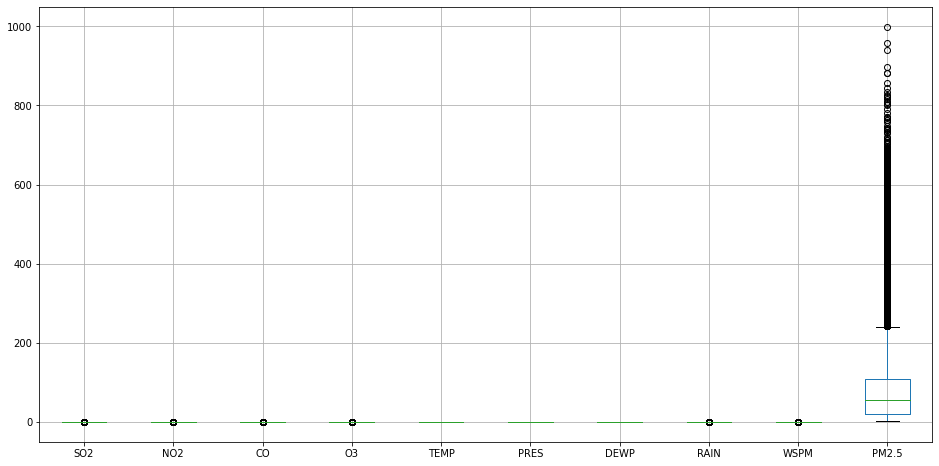

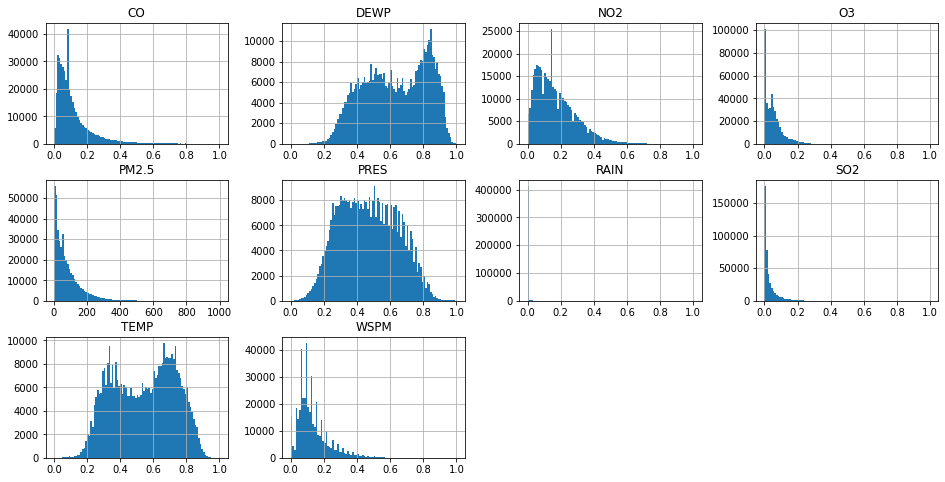

In [13]:
## Using Mean normalization
# df = (df-df.mean())/df.std()
## Using Min - Max normalization
df2 = df[['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].copy()
df2 = (df2-df2.min())/(df2.max()-df2.min())

df2['PM2.5'] = df['PM2.5']
df = df2.copy()

df.boxplot(figsize=[16,8])
df.hist(bins=100, layout=(3,4), figsize=[16,8]);

df.head(10)

# Split data:

In [38]:
## Shuffle df
import random

def shuffle(df):
    index = list(df.index)
    random.shuffle(index)
    df = df.iloc[index]
    df.reset_index()
    return df

df = shuffle(df)
df.head(10)

,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
34263,7.0,6.0,24.0,500.0,57.0,9.275,1011.75,-12.9,3.5
376,139.0,51.0,50.0,1600.0,107.0,13.400,1011.50,0.1,2.9
11787,131.0,2.0,29.0,1100.0,56.0,25.200,997.80,21.3,1.4
17199,306.0,115.0,134.0,5000.0,25.0,8.000,1009.00,-6.6,1.6
20244,113.0,22.0,21.0,1200.0,196.0,28.900,996.60,15.8,2.6
33133,81.0,34.0,76.0,1900.0,6.0,4.700,1019.40,-10.6,1.6
33500,169.0,20.0,95.0,2600.0,2.0,-0.400,1019.30,-6.8,0.9
24936,55.0,15.0,38.0,1100.0,30.0,1.000,1017.50,-10.8,2.1
7831,23.0,99.0,36.0,700.0,26.0,-4.200,1025.80,-20.0,2.3
19010,39.0,2.0,24.0,600.0,13.0,14.200,1001.50,12.1,0.5


In [0]:
# split data into trainng 90% and test 10%
# split training data into trsining set and validation set 80:20
total_data_count = len(df)
test_data_count = int(total_data_count*0.1)
training_data_count = int((total_data_count - test_data_count)*0.8)

test_df = df[0: test_data_count]
training_df = df[test_data_count : training_data_count + test_data_count]
validation_df = df[training_data_count + test_data_count ::]
#print(len(test_df))
#print(len(training_df))
#print(len(validation_df))

# Simple Linear Regression:

Training Data (302953, 8) (302953, 1)
Validation Data (75739, 8) (75739, 1)
Cuda is available!
Epoch 0, training loss 35077.83203125, val loss 35711.45703125
Epoch 1000, training loss 23749.017578125, val loss 24205.271484375
Epoch 2000, training loss 17201.34375, val loss 17526.412109375
Epoch 3000, training loss 13157.2373046875, val loss 13388.0771484375
Epoch 4000, training loss 10089.4658203125, val loss 10254.7626953125
Epoch 5000, training loss 7484.154296875, val loss 7599.96435546875
Epoch 6000, training loss 5422.564453125, val loss 5499.15576171875
Epoch 7000, training loss 3947.494140625, val loss 3994.58740234375
Epoch 8000, training loss 3012.9765625, val loss 3039.7119140625
Epoch 9000, training loss 2509.489013671875, val loss 2523.591064453125
Epoch 10000, training loss 2288.2119140625, val loss 2295.308349609375
Epoch 11000, training loss 2203.6376953125, val loss 2207.380615234375
Epoch 12000, training loss 2161.638916015625, val loss 2164.062744140625
Epoch 13000, t

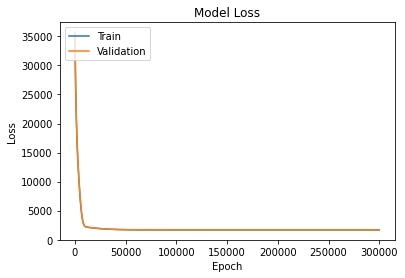

In [42]:
import torch
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
test_local = training_df #test using CPU only, too slow to process 25k data

target_col = test_local["PM2.5"].to_numpy(dtype=np.float32,copy=True).reshape(-1,1)
data_col = test_local.drop(columns=["PM2.5"]).to_numpy(dtype=np.float32,copy=True)

val_y = validation_df["PM2.5"].to_numpy(dtype=np.float32,copy=True).reshape(-1,1)
val_x = validation_df.drop(columns=["PM2.5"]).to_numpy(dtype=np.float32,copy=True)


print("Training Data",data_col.shape,target_col.shape)
print("Validation Data",val_x.shape,val_y.shape)


model = torch.nn.Sequential(
    torch.nn.Linear(8, 1),
)

enable_cuda = True

if torch.cuda.is_available() and enable_cuda:
    print("Cuda is available!")
    model.cuda()
else:
    print("Cuda not available, using CPU")

loss_fn = nn.MSELoss()
# loss_fn = nn.L1Loss()
# loss_fn = nn.SmoothL1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-05)
# optimizer = torch.optim.SGD(model.parameters(),lr=1e-05)

train_loss_history = []
val_loss_history = []

for epoch in range(300000):
    
    ## Training
#     model.train(True)
    if torch.cuda.is_available() and enable_cuda:
        y = Variable(torch.from_numpy(target_col).cuda())
        x = Variable(torch.from_numpy(data_col).cuda())
    else:
        y = Variable(torch.from_numpy(target_col))
        x = Variable(torch.from_numpy(data_col))
    y_pred = model(x)
    
    training_loss = loss_fn(y_pred, y)
    
    optimizer.zero_grad()
    training_loss.backward()
    optimizer.step()
    
     ## Validation
#     model.train(False)
    if torch.cuda.is_available() and enable_cuda:
        y = Variable(torch.from_numpy(val_y).cuda())
        x = Variable(torch.from_numpy(val_x).cuda())
    else:
        y = Variable(torch.from_numpy(val_y))
        x = Variable(torch.from_numpy(val_x))
    y_pred = model(x)
    val_loss = loss_fn(y_pred,y)
    train_loss_history.append(training_loss.item())
    val_loss_history.append(val_loss.item())

    
    if epoch % 1000 == 0:
        print('Epoch {}, training loss {}, val loss {}'.format(epoch,training_loss.item(),val_loss.item()))
       
        

import matplotlib.pyplot as plt

%matplotlib inline

# Plot training & validation accuracy values
plt.plot(train_loss_history)
plt.plot(val_loss_history)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [71]:
## Test
def test(test_y, test_x):
    if torch.cuda.is_available() and enable_cuda:
        y = Variable(torch.from_numpy(test_y).cuda())
        x = Variable(torch.from_numpy(test_x).cuda())
    else:
        y = Variable(torch.from_numpy(test_y))
        x = Variable(torch.from_numpy(test_x))
    y_pred = model(x)
    test_loss = loss_fn(y_pred,y)
    return y_pred, test_loss.item()

test_y = test_df["PM2.5"].to_numpy(dtype=np.float32,copy=True).reshape(-1,1)
test_x = test_df.drop(columns=["PM2.5"]).to_numpy(dtype=np.float32,copy=True)
y_pred, test_loss = test(test_y, test_x)

result = test_df.copy()
result['Predict_PM2.5'] = y_pred.type(torch.FloatTensor).cpu().detach().numpy().astype(float)

print(result.iloc[1])
print('Test loss is {}'.format(test_loss))

PM2.5             139.000000
SO2                51.000000
NO2                50.000000
CO               1600.000000
O3                107.000000
TEMP               13.400000
PRES             1011.500000
DEWP                0.100000
WSPM                2.900000
Predict_PM2.5     120.534065
Name: 376, dtype: float64
Test loss is 1665.009521484375


In [65]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4201,  0.9636,  0.0291,  0.2987, -1.3879, -0.0229,  1.9186,  3.0813]],
                     device='cuda:0')),
             ('0.bias', tensor([5.0152], device='cuda:0'))])

In [44]:
df.head()

,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
34263,7.0,6.0,24.0,500.0,57.0,9.275,1011.75,-12.9,3.5
376,139.0,51.0,50.0,1600.0,107.0,13.400,1011.50,0.1,2.9
11787,131.0,2.0,29.0,1100.0,56.0,25.200,997.80,21.3,1.4
17199,306.0,115.0,134.0,5000.0,25.0,8.000,1009.00,-6.6,1.6
20244,113.0,22.0,21.0,1200.0,196.0,28.900,996.60,15.8,2.6
